In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import os

print(tf.__version__)

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K
from keras.initializers import RandomNormal

from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout, ZeroPadding2D, UpSampling2D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Conv1DTranspose,AveragePooling1D,GlobalMaxPool1D,GlobalAveragePooling1D
from tensorflow.keras.layers import Conv2D,MaxPool2D,Conv2DTranspose,AveragePooling2D,GlobalMaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Conv3D,MaxPooling3D,Conv3DTranspose,AveragePooling3D,GlobalMaxPool3D,GlobalAveragePooling3D
from tensorflow.keras.layers import Dense,Flatten,Dropout,Concatenate,Layer,BatchNormalization,Input,Add,Activation,Average



2.15.0


In [17]:
import random
r, g, b = [random.uniform(0.7,1) for i in range(3)]
print(r,g,b)

0.973418209245603 0.7595828739436064 0.9593315553578847


In [22]:
#data_path = "outlineOutput"
data_path = "H:\\download\\blender\\projects\\vdmTests\\outlineOutput"

train_path = data_path + "/train/*"
edge_train_path = data_path + "/train_edge/*"

test_path = data_path + "/test/*"
edge_test_path = data_path + "/test_edge/*"

val_path = data_path + "/val/*"
edge_val_path = data_path + "/val_edge/*"

print(edge_test_path)


outlineOutput/test_edge/*


In [23]:
def load_data(ipath, epath):
    images = sorted(glob(os.path.join(ipath)))
    edges = sorted(glob(os.path.join(epath)))
    return images, edges

In [24]:
images, edges = load_data(train_path, edge_train_path)
testimg, testedg = load_data(test_path, edge_test_path)
#print(len(images), len(edges))

In [25]:
#print(len(testimg), len(testedg))

In [26]:
def read_image(path, H=512, W=912):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (W,H))
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_edge_old(path, H=512, W=912):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, x = cv2.threshold(x,127,255,cv2.THRESH_BINARY)
    x = cv2.resize(x, (W,H))
    x = np.expand_dims(x, axis=-1)
    x = x/255.0
    x = x.astype(np.float32)
    return x
def read_edge(path, H=512, W=912):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (W,H))
    x = np.expand_dims(x, axis=-1)
    x = x/255.0
    x = x.astype(np.float32)
    return x

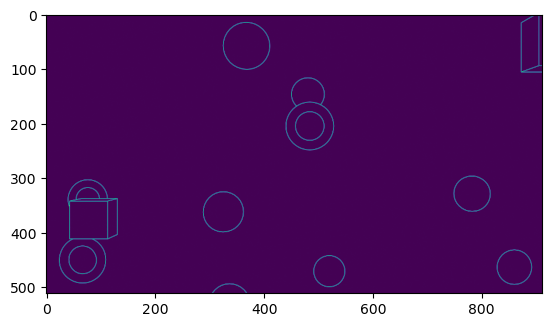

In [27]:

img = read_edge("outlineOutput/test_edge/rare_723.png", H=512, W=912)
plt.imshow(img)

In [28]:
def preprocess(x,y,H=512, W=912):

    def f(x,y):
        x = x.decode()
        y = y.decode()

        x = read_image(x)
        y = read_edge(y)
        return x, y

    images, edges = tf.numpy_function(f, [x, y], [tf.float32, tf.float32])
    images.set_shape([H, W, 3])
    edges.set_shape([H, W, 1])
    return images, edges

In [29]:
def tf_data(x,y):
    data = tf.data.Dataset.from_tensor_slices((x,y))
    data = data.shuffle(buffer_size=100)
    data = data.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    data = data.batch(16)
    data = data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return data


In [30]:
train_data = tf_data(images, edges)
test_data = tf_data(testimg, testedg)

In [31]:
#for x, y in train_data:
#  print(x.shape, y.shape)
#
print(len(train_data))


1300


In [32]:
weight_init = tf.initializers.glorot_uniform()

l2 = regularizers.l2
w_decay=1e-3

glorot_normal = RandomNormal(stddev=0.01)

In [33]:
self_conv2D_3 = Conv2D(32 , kernel_size=(3,3),strides=(2,2),padding = 'same',use_bias=True,kernel_initializer= glorot_normal)
self_batchnormalization_24 = BatchNormalization()
self_conv2D_40 = Conv2D(64 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True,kernel_initializer= glorot_normal)
self_batchnormalization_18 = BatchNormalization()
self_activation_11 = Activation(activation='relu')
self_conv2D_1 = Conv2D(128 , kernel_size=(3,3),strides=(1,1),padding = 'same')
self_conv2D_16 = Conv2D(128 , kernel_size=(1,1),strides=(2,2),padding = 'same',use_bias=True)
self_conv2D_51 = Conv2D(1 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_1 = BatchNormalization()
self_transpoze2D_9 = Conv2DTranspose(1 , kernel_size=(2,2),strides=(2,2),padding = 'same')
self_conv2D_49 = Conv2D(128 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_8 = BatchNormalization()
self_activation_1 = Activation(activation='relu')
self_conv2D_17 = Conv2D(1 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_maxpool2D_1 = MaxPool2D(pool_size=(3,3),strides=(2,2),padding = 'same')
self_transpoze2D_10 = Conv2DTranspose(1 , kernel_size=(2,2),strides=(2,2),padding = 'same')
self_conv2D_28 = Conv2D(256 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_36 = Conv2D(256 , kernel_size=(1,1),strides=(2,2),padding = 'same',use_bias=True)
self_activation_8 = Activation(activation='relu')
self_conv2D_47 = Conv2D(256 , kernel_size=(1,1),strides=(2,2),padding = 'same',use_bias=True)
self_conv2D_48 = Conv2D(512 , kernel_size=(1,1),strides=(2,2),padding = 'same')
self_conv2D_33 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_6 = BatchNormalization()
self_activation_9 = Activation(activation='relu')
self_conv2D_31 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_22 = BatchNormalization()
self_activation_6 = Activation(activation='relu')
self_conv2D_30 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_4 = BatchNormalization()
self_activation_7 = Activation(activation='relu')
self_conv2D_18 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_20 = BatchNormalization()
self_conv2D_38 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_maxpool2D_2 = MaxPool2D(pool_size=(3,3),strides=(2,2),padding = 'same')
self_transpoze2D_15 = Conv2DTranspose(16 , kernel_size=(4,4),strides=(2,2),padding = 'same')
self_conv2D_11 = Conv2D(1 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_34 = Conv2D(512 , kernel_size=(1,1),strides=(2,2),padding = 'same',use_bias=True)
self_conv2D_50 = Conv2D(512 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_2 = Conv2DTranspose(1 , kernel_size=(4,4),strides=(2,2),padding = 'same')
self_activation_10 = Activation(activation='relu')
self_conv2D_32 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_10 = BatchNormalization()
self_activation_5 = Activation(activation='relu')
self_conv2D_27 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_19 = BatchNormalization()
self_activation_24 = Activation(activation='relu')
self_conv2D_26 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_13 = BatchNormalization()
self_activation_16 = Activation(activation='relu')
self_conv2D_13 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_17 = BatchNormalization()
self_activation_22 = Activation(activation='relu')
self_conv2D_29 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_15 = BatchNormalization()
self_activation_23 = Activation(activation='relu')
self_conv2D_24 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_12 = BatchNormalization()
self_conv2D_44 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_maxpool2D_3 = MaxPool2D(pool_size=(3,3),strides=(2,2),padding = 'same')
self_transpoze2D_7 = Conv2DTranspose(16 , kernel_size=(8,8),strides=(2,2),padding = 'same')
self_conv2D_45 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_activation_15 = Activation(activation='relu')
self_conv2D_6 = Conv2D(512 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_2 = Conv2D(512 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_8 = Conv2DTranspose(16 , kernel_size=(8,8),strides=(2,2),padding = 'same')
self_conv2D_43 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_41 = Conv2D(1 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_7 = BatchNormalization()
self_transpoze2D_14 = Conv2DTranspose(1 , kernel_size=(8,8),strides=(2,2),padding = 'same')
self_activation_17 = Activation(activation='relu')
self_conv2D_19 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_16 = BatchNormalization()
self_activation_13 = Activation(activation='relu')
self_conv2D_21 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_14 = BatchNormalization()
self_activation_14 = Activation(activation='relu')
self_conv2D_15 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_5 = BatchNormalization()
self_activation_18 = Activation(activation='relu')
self_conv2D_14 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_26 = BatchNormalization()
self_activation_19 = Activation(activation='relu')
self_conv2D_5 = Conv2D(512 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_3 = BatchNormalization()
self_conv2D_8 = Conv2D(256 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_35 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_activation_20 = Activation(activation='relu')
self_transpoze2D_4 = Conv2DTranspose(16 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_conv2D_22 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_12 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_11 = BatchNormalization()
self_transpoze2D_12 = Conv2DTranspose(16 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_activation_21 = Activation(activation='relu')
self_conv2D_37 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_conv2D_10 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_5 = Conv2DTranspose(16 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_batchnormalization_21 = BatchNormalization()
self_conv2D_42 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_13 = Conv2DTranspose(1 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_activation_3 = Activation(activation='relu')
self_conv2D_20 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_9 = BatchNormalization()
self_activation_4 = Activation(activation='relu')
self_conv2D_23 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_2 = BatchNormalization()
self_activation_2 = Activation(activation='relu')
self_conv2D_7 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_23 = BatchNormalization()
self_activation_12 = Activation(activation='relu')
self_conv2D_25 = Conv2D(256 , kernel_size=(3,3),strides=(1,1),padding = 'same',use_bias=True)
self_batchnormalization_25 = BatchNormalization()
self_conv2D_39 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_11 = Conv2DTranspose(16 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_conv2D_4 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_3 = Conv2DTranspose(16 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_conv2D_9 = Conv2D(16 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_6 = Conv2DTranspose(16 , kernel_size=(16,16),strides=(2,2),padding = 'same')
self_conv2D_46 = Conv2D(1 , kernel_size=(1,1),strides=(1,1),padding = 'same',use_bias=True)
self_transpoze2D_1 = Conv2DTranspose(1 , kernel_size=(16,16),strides=(2,2),padding = 'same')
#self_block_cat = SingleConvBlock(
#    1,k_size=(1,1),stride=(1,1),
#    w_init=tf.constant_initializer(1/5))

self_last_conv = Conv2D(1, kernel_size=(1,1), strides=(1,1), padding = 'same', kernel_initializer=tf.constant_initializer(1/5))
self_last_batchnormalization = BatchNormalization()
self_last_activation = Activation(activation='relu')

#-------------------------------------

x = Input(shape=(512,912,3))
conv2D_3 = self_conv2D_3(x)
batchnormalization_24 = self_batchnormalization_24(conv2D_3)
conv2D_40 = self_conv2D_40(batchnormalization_24)
batchnormalization_18 = self_batchnormalization_18(conv2D_40)
activation_11 = self_activation_11(batchnormalization_18)
conv2D_1 = self_conv2D_1(activation_11)
conv2D_16 = self_conv2D_16(activation_11)
conv2D_51 = self_conv2D_51(activation_11)
batchnormalization_1 = self_batchnormalization_1(conv2D_1)
transpoze2D_9 = self_transpoze2D_9(conv2D_51)
conv2D_49 = self_conv2D_49(batchnormalization_1)
batchnormalization_8 = self_batchnormalization_8(conv2D_49)
activation_1 = self_activation_1(batchnormalization_8)
conv2D_17 = self_conv2D_17(activation_1)
maxpool2D_1 = self_maxpool2D_1(activation_1)
transpoze2D_10 = self_transpoze2D_10(conv2D_17)
add_1 = Add()([conv2D_16,maxpool2D_1])
conv2D_28 = self_conv2D_28(maxpool2D_1)
conv2D_36 = self_conv2D_36(maxpool2D_1)
activation_8 = self_activation_8(add_1)
conv2D_47 = self_conv2D_47(add_1)
conv2D_48 = self_conv2D_48(conv2D_36)
conv2D_33 = self_conv2D_33(activation_8)
batchnormalization_6 = self_batchnormalization_6(conv2D_33)
activation_9 = self_activation_9(batchnormalization_6)
conv2D_31 = self_conv2D_31(activation_9)
batchnormalization_22 = self_batchnormalization_22(conv2D_31)
average_5 = Average()([batchnormalization_22,conv2D_28])
activation_6 = self_activation_6(average_5)
conv2D_30 = self_conv2D_30(activation_6)
batchnormalization_4 = self_batchnormalization_4(conv2D_30)
activation_7 = self_activation_7(batchnormalization_4)
conv2D_18 = self_conv2D_18(activation_7)
batchnormalization_20 = self_batchnormalization_20(conv2D_18)
average_4 = Average()([batchnormalization_20,conv2D_28])
conv2D_38 = self_conv2D_38(average_4)
maxpool2D_2 = self_maxpool2D_2(average_4)
transpoze2D_15 = self_transpoze2D_15(conv2D_38)
add_2 = Add()([conv2D_47,maxpool2D_2])
add_4 = Add()([conv2D_36,maxpool2D_2])
conv2D_11 = self_conv2D_11(transpoze2D_15)
conv2D_34 = self_conv2D_34(add_2)
conv2D_50 = self_conv2D_50(add_4)
transpoze2D_2 = self_transpoze2D_2(conv2D_11)
activation_10 = self_activation_10(add_2)
conv2D_32 = self_conv2D_32(activation_10)
batchnormalization_10 = self_batchnormalization_10(conv2D_32)
activation_5 = self_activation_5(batchnormalization_10)
conv2D_27 = self_conv2D_27(activation_5)
batchnormalization_19 = self_batchnormalization_19(conv2D_27)
average_3 = Average()([batchnormalization_19,conv2D_50])
activation_24 = self_activation_24(average_3)
conv2D_26 = self_conv2D_26(activation_24)
batchnormalization_13 = self_batchnormalization_13(conv2D_26)
activation_16 = self_activation_16(batchnormalization_13)
conv2D_13 = self_conv2D_13(activation_16)
batchnormalization_17 = self_batchnormalization_17(conv2D_13)
average_2 = Average()([batchnormalization_17,conv2D_50])
activation_22 = self_activation_22(average_2)
conv2D_29 = self_conv2D_29(activation_22)
batchnormalization_15 = self_batchnormalization_15(conv2D_29)
activation_23 = self_activation_23(batchnormalization_15)
conv2D_24 = self_conv2D_24(activation_23)
batchnormalization_12 = self_batchnormalization_12(conv2D_24)
average_11 = Average()([batchnormalization_12,conv2D_50])
conv2D_44 = self_conv2D_44(average_11)
maxpool2D_3 = self_maxpool2D_3(average_11)
transpoze2D_7 = self_transpoze2D_7(conv2D_44)
add_3 = Add()([conv2D_34,maxpool2D_3])
add_5 = Add()([conv2D_48,maxpool2D_3])
conv2D_45 = self_conv2D_45(transpoze2D_7)
activation_15 = self_activation_15(add_3)
conv2D_6 = self_conv2D_6(add_3)
conv2D_2 = self_conv2D_2(add_5)
transpoze2D_8 = self_transpoze2D_8(conv2D_45)
conv2D_43 = self_conv2D_43(activation_15)
conv2D_41 = self_conv2D_41(transpoze2D_8)
batchnormalization_7 = self_batchnormalization_7(conv2D_43)
transpoze2D_14 = self_transpoze2D_14(conv2D_41)
activation_17 = self_activation_17(batchnormalization_7)
conv2D_19 = self_conv2D_19(activation_17)
batchnormalization_16 = self_batchnormalization_16(conv2D_19)
average_7 = Average()([batchnormalization_16,conv2D_2])
activation_13 = self_activation_13(average_7)
conv2D_21 = self_conv2D_21(activation_13)
batchnormalization_14 = self_batchnormalization_14(conv2D_21)
activation_14 = self_activation_14(batchnormalization_14)
conv2D_15 = self_conv2D_15(activation_14)
batchnormalization_5 = self_batchnormalization_5(conv2D_15)
average_6 = Average()([batchnormalization_5,conv2D_2])
activation_18 = self_activation_18(average_6)
conv2D_14 = self_conv2D_14(activation_18)
batchnormalization_26 = self_batchnormalization_26(conv2D_14)
activation_19 = self_activation_19(batchnormalization_26)
conv2D_5 = self_conv2D_5(activation_19)
batchnormalization_3 = self_batchnormalization_3(conv2D_5)
average_1 = Average()([batchnormalization_3,conv2D_2])
add_6 = Add()([average_1,conv2D_6])
conv2D_8 = self_conv2D_8(average_1)
conv2D_35 = self_conv2D_35(average_1)
activation_20 = self_activation_20(add_6)
transpoze2D_4 = self_transpoze2D_4(conv2D_35)
conv2D_22 = self_conv2D_22(activation_20)
conv2D_12 = self_conv2D_12(transpoze2D_4)
batchnormalization_11 = self_batchnormalization_11(conv2D_22)
transpoze2D_12 = self_transpoze2D_12(conv2D_12)
activation_21 = self_activation_21(batchnormalization_11)
conv2D_37 = self_conv2D_37(transpoze2D_12)
conv2D_10 = self_conv2D_10(activation_21)
transpoze2D_5 = self_transpoze2D_5(conv2D_37)
batchnormalization_21 = self_batchnormalization_21(conv2D_10)
conv2D_42 = self_conv2D_42(transpoze2D_5)
average_10 = Average()([batchnormalization_21,conv2D_8])
transpoze2D_13 = self_transpoze2D_13(conv2D_42)
activation_3 = self_activation_3(average_10)
conv2D_20 = self_conv2D_20(activation_3)
batchnormalization_9 = self_batchnormalization_9(conv2D_20)
activation_4 = self_activation_4(batchnormalization_9)
conv2D_23 = self_conv2D_23(activation_4)
batchnormalization_2 = self_batchnormalization_2(conv2D_23)
average_9 = Average()([batchnormalization_2,conv2D_8])
activation_2 = self_activation_2(average_9)
conv2D_7 = self_conv2D_7(activation_2)
batchnormalization_23 = self_batchnormalization_23(conv2D_7)
activation_12 = self_activation_12(batchnormalization_23)
conv2D_25 = self_conv2D_25(activation_12)
batchnormalization_25 = self_batchnormalization_25(conv2D_25)
average_8 = Average()([batchnormalization_25,conv2D_8])
conv2D_39 = self_conv2D_39(average_8)
transpoze2D_11 = self_transpoze2D_11(conv2D_39)
conv2D_4 = self_conv2D_4(transpoze2D_11)
transpoze2D_3 = self_transpoze2D_3(conv2D_4)
conv2D_9 = self_conv2D_9(transpoze2D_3)
transpoze2D_6 = self_transpoze2D_6(conv2D_9)
conv2D_46 = self_conv2D_46(transpoze2D_6)
transpoze2D_1 = self_transpoze2D_1(conv2D_46)
#tmp = [transpoze2D_1,transpoze2D_2,transpoze2D_9,transpoze2D_10,transpoze2D_13,transpoze2D_14]
tmp = [transpoze2D_9,transpoze2D_10,transpoze2D_2,transpoze2D_14,transpoze2D_13,transpoze2D_1]

#-----------
#concatenate_1 = tf.concat(tmp,3)
#-----------
#concat_lambda = lambda xs: tf.concat(xs, axis=3)
#concatenate_1 = tf.keras.layers.Lambda(concat_lambda)(tmp,3)
#-----------
self_concatenate_1 = Concatenate(axis=3)
concatenate_1 = self_concatenate_1(tmp)

#print(f"concatenate_1 shape: {concatenate_1.shape}")
#return concatenate_1

#results = [transpoze2D_1,transpoze2D_2,transpoze2D_9,transpoze2D_10,transpoze2D_13,transpoze2D_14]
#block_cat = tf.concat(results, 3)  # BxHxWX6
#print(f"CONCATENATE_1 shape: {block_cat.shape}")
#block_cat = self_block_cat(block_cat)  # BxHxWX1
#results.append(block_cat)


last_conv =self_last_conv(concatenate_1)
last_batchnormalization = self_last_batchnormalization(last_conv)
last_activation = self_last_activation(last_batchnormalization)
#concatenate_1 = Concatenate()([transpoze2D_1,transpoze2D_3,transpoze2D_4,transpoze2D_7,transpoze2D_8,transpoze2D_10])




model = Model(inputs =x , outputs=last_activation)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [34]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 912, 3)]        0         []                            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 256, 456, 32)         896       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_27 (Ba  (None, 256, 456, 32)         128       ['conv2d_52[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_53 (Conv2D)          (None, 256, 456, 64)         18496     ['batch_normalization_27

In [35]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[tf.keras.metrics.BinaryAccuracy(),
             tf.keras.metrics.FalseNegatives(),
             tf.keras.metrics.FalsePositives(),
             tf.keras.metrics.TruePositives(),
             tf.keras.metrics.TrueNegatives()])

In [37]:
train_steps=len(train_data)
val_steps=len(test_data)
print(train_steps)
model.fit(train_data, validation_data=test_data, epochs=2, steps_per_epoch=train_steps, validation_steps=val_steps)

1300
Epoch 1/2


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tensorflow.python.ops.init_ops_v2.Constant'>, which may lead to improper serialization.
  warnings.warn(


1/1 [==============================] - 48s 48s/step


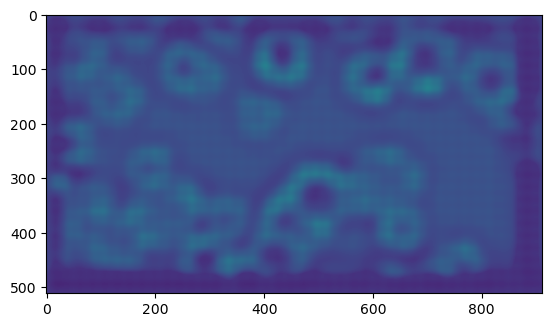

In [16]:
model.save('./DexiNed_batchSize4.h5')
img_pre = read_image('outlineOutput/val_edge/dense_981.png')
img = np.expand_dims(img_pre, axis=0)
#plt.imshow(img_e)
res_pre = model.predict(img)
res = res_pre[-1,:,:]
plt.imshow(res)

In [17]:
model.fit(train_data, validation_data=test_data, epochs=8, steps_per_epoch=train_steps, validation_steps=val_steps)

Epoch 1/8
1300/1300 [==============================] - 12720s 10s/step - loss: 0.0650 - binary_accuracy: 0.5605 - false_negatives: 4265762304.0000 - false_positives: 254265.0000 - true_positives: 216887.0000 - true_negatives: 5441065984.0000 - val_loss: 0.1396 - val_binary_accuracy: 0.5658 - val_false_negatives: 398201440.0000 - val_false_positives: 17971.0000 - val_true_positives: 15474.0000 - val_true_negatives: 518842976.0000
Epoch 2/8
1300/1300 [==============================] - 13297s 10s/step - loss: 0.0602 - binary_accuracy: 0.5605 - false_negatives: 4265697792.0000 - false_positives: 329243.0000 - true_positives: 278230.0000 - true_negatives: 5440991232.0000 - val_loss: 0.0900 - val_binary_accuracy: 0.5658 - val_false_negatives: 398216896.0000 - val_false_positives: 0.0000e+00 - val_true_positives: 105.0000 - val_true_negatives: 518861056.0000
Epoch 3/8
1300/1300 [==============================] - 14569s 11s/step - loss: 0.0554 - binary_accuracy: 0.5605 - false_negatives: 42659

In [48]:
#model.save('./DexiNed.h5')
model.save('./DexiNed_train-21K_test-2K_epoch10_batchsize16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tensorflow.python.ops.init_ops_v2.Constant'>, which may lead to improper serialization.
  warnings.warn(


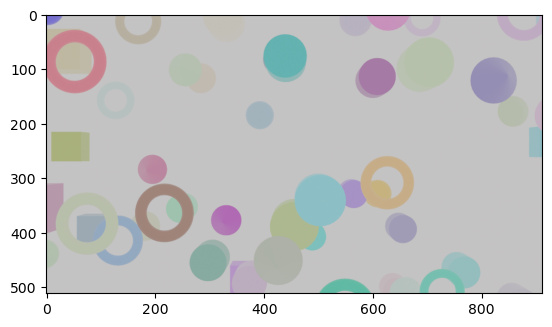

In [30]:
img_pre = read_image('outlineOutput/val/dense_981.png')
img = np.expand_dims(img_pre, axis=0)
plt.imshow(img_pre)

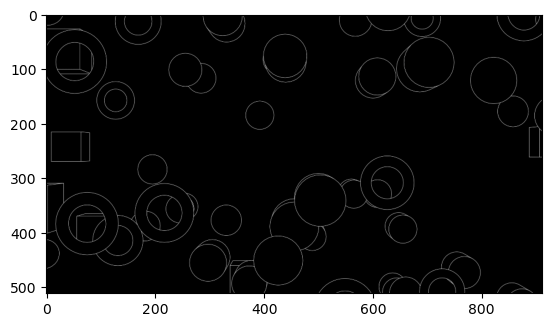

In [22]:
img_e = read_image('outlineOutput/val_edge/dense_981.png')
#img = np.expand_dims(img, axis=0)
plt.imshow(img_e)

In [26]:
res = model.predict(img)

1/1 [==============================] - 2s 2s/step


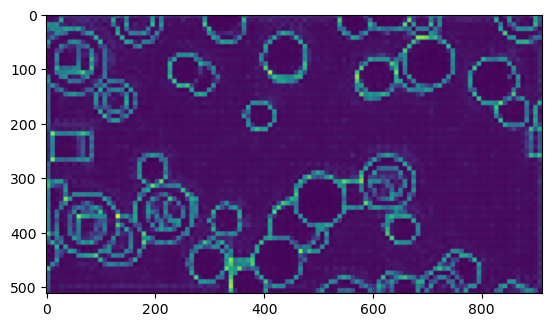

In [27]:
res = res[-1,:,:]
plt.imshow(res)

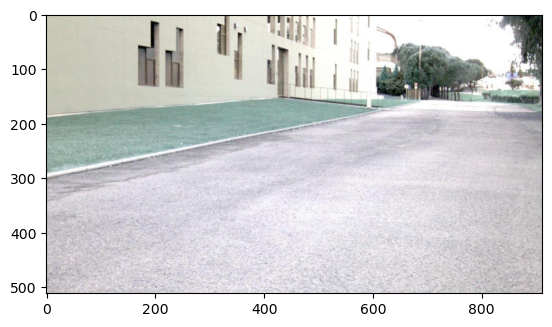

In [34]:

img_pre = read_image('BIPED/edges/imgs/train/rgbr/real/RGB_258.jpg')
imgg = np.expand_dims(img_pre, axis=0)
plt.imshow(img_pre)

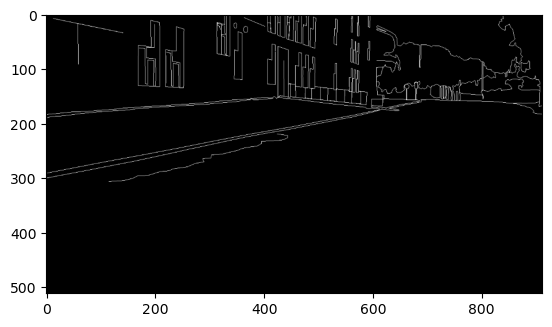

In [38]:

edge_pre = read_image('BIPED/edges/edge_maps/train/rgbr/real/RGB_258.png')
#imgg = np.expand_dims(edge_pre, axis=0)
plt.imshow(edge_pre)

In [35]:
res = model.predict(imgg)
res = res[-1,:,:]


1/1 [==============================] - 0s 53ms/step


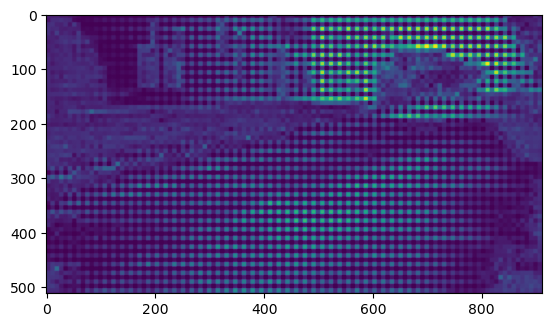

In [36]:
plt.imshow(res)

1/1 [==============================] - 2s 2s/step


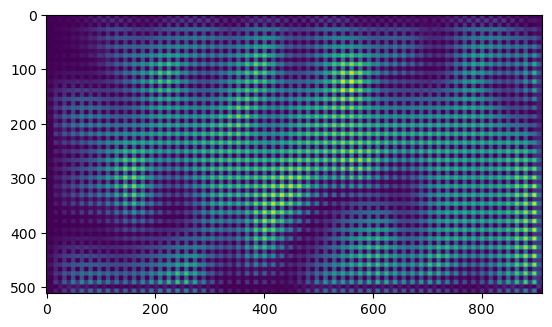

In [39]:
#DexiNed_train-21K_test-2K_epoch8_batchsize16
model8epoch = tf.keras.models.load_model("DexiNed_train-21K_test-2K_epoch8_batchsize16.h5")
img_pre = read_image('outlineOutput/val/dense_981.png')
img = np.expand_dims(img_pre, axis=0)
res = model8epoch.predict(img)
res = res[-1,:,:]
plt.imshow(res)

1/1 [==============================] - 1s 566ms/step


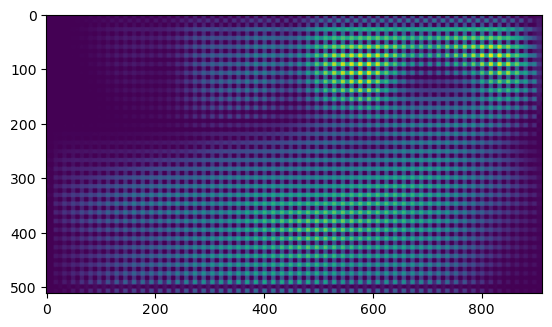

In [46]:

img_pre = read_image('BIPED/edges/imgs/train/rgbr/real/RGB_258.jpg')
imgg = np.expand_dims(img_pre, axis=0)
resg = model8epoch.predict(imgg)
resg = resg[-1,:,:]
plt.imshow(resg)

In [42]:

print(model8epoch.optimizer.iterations)

<tf.Variable 'iteration:0' shape=() dtype=int64, numpy=13000>


In [47]:
model8epoch.fit(train_data, validation_data=test_data, epochs=10, steps_per_epoch=train_steps, validation_steps=val_steps)

Epoch 1/10
1300/1300 [==============================] - 12609s 10s/step - loss: 0.0481 - binary_accuracy: 0.5605 - false_negatives: 4265978880.0000 - false_positives: 245.0000 - true_positives: 193.0000 - true_negatives: 5441324544.0000 - val_loss: 0.0436 - val_binary_accuracy: 0.5658 - val_false_negatives: 398216832.0000 - val_false_positives: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_true_negatives: 518861120.0000
Epoch 2/10
1300/1300 [==============================] - 12297s 9s/step - loss: 0.0478 - binary_accuracy: 0.5605 - false_negatives: 4265977088.0000 - false_positives: 0.0000e+00 - true_positives: 0.0000e+00 - true_negatives: 5441322496.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.5658 - val_false_negatives: 397503072.0000 - val_false_positives: 0.0000e+00 - val_true_positives: 713860.0000 - val_true_negatives: 518861088.0000
Epoch 3/10
1300/1300 [==============================] - 12302s 9s/step - loss: 0.0470 - binary_accuracy: 0.5605 - false_negatives: 426597990

model.save('./DexiNed_train-21K_test-2K_epoch20_batchsize16.h5')

model.save('./DexiNed_train-21K_test-2K_epoch20_batchsize16.h5')


1/1 [==============================] - 1s 936ms/step


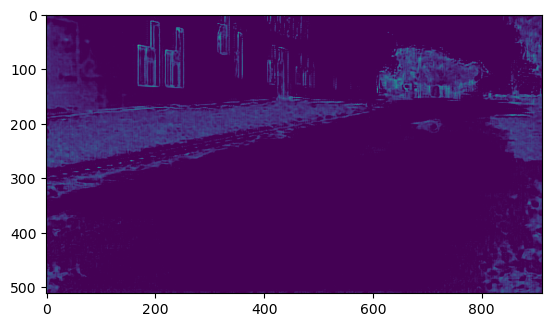

In [49]:
img_pre = read_image('BIPED/edges/imgs/train/rgbr/real/RGB_258.jpg')
resg = model8epoch.predict(imgg)
resg = resg[-1,:,:]
plt.imshow(resg)

1/1 [==============================] - 1s 723ms/step


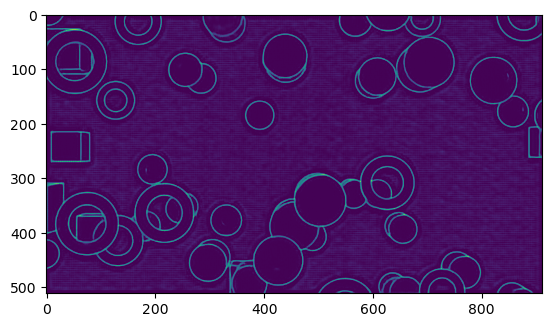

In [50]:
img_pre = read_image('outlineOutput/val/dense_981.png')
img = np.expand_dims(img_pre, axis=0)
res = model8epoch.predict(img)
res = res[-1,:,:]
plt.imshow(res)

1/1 [==============================] - 1s 1s/step


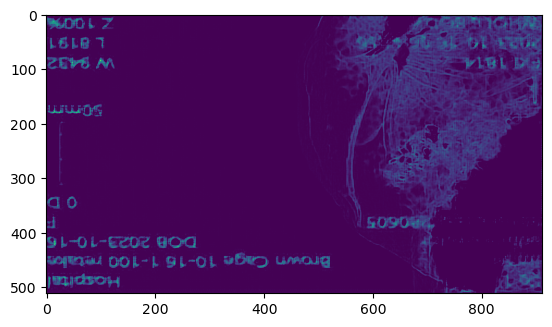

In [51]:
img_pre = read_image('outlineOutput/val/hyl4.jpg')
img = np.expand_dims(img_pre, axis=0)
res = model8epoch.predict(img)
res = res[-1,:,:]
plt.imshow(res)